<a href="https://colab.research.google.com/github/Mano2610/CE888/blob/main/Lab/Lab2/bootstap_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [1]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [2]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [3]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
  array_of_samples = [np.random.choice(x, sample_size) for _ in range(n_bootstraps)]
  data_mean = np.mean(x)
  sample_means = [np.mean(s) for s in array_of_samples]

  CI = 95
  diff = (100 - CI) / 2
  lower_bound = np.percentile(sample_means, diff)
  upper_bound = np.percentile(sample_means, 100 - diff)

  return data_mean,lower_bound,upper_bound

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

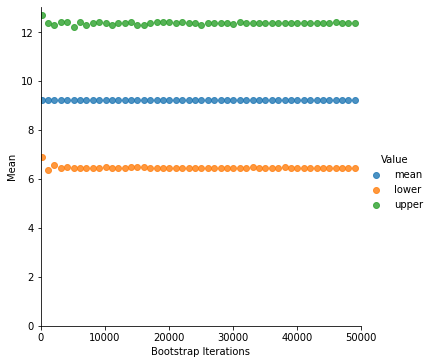

In [4]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [5]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  array_of_samples = [np.random.choice(sample, sample_size) for _ in range(n_bootstraps)]
  data_mean = np.mean(sample)
  sample_means = [np.mean(s) for s in array_of_samples]

  
  diff = (100 - ci) / 2
  lower_bound = np.percentile(sample_means, diff)
  upper_bound = np.percentile(sample_means, 100 - diff)
  return data_mean,lower_bound,upper_bound

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

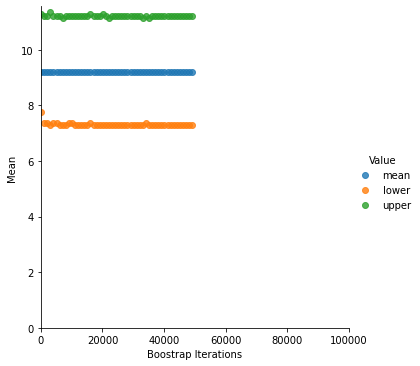

In [6]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0],"mean"])
    boots.append([i, boot[1],"lower"])
    boots.append([i, boot[2],"upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [7]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).

df_vehicle = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv")

# Note: you can add more cells as needed to organise your code and your plots

df_vehicle.head(5)

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


In [8]:
df_vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Current fleet  249 non-null    int64  
 1   New Fleet      79 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 4.0 KB


In [9]:
df_vehicle.reset_index(inplace=True)

In [10]:
df_vehicle.columns

Index(['index', 'Current fleet', 'New Fleet'], dtype='object')

In [11]:
current_fleet = df_vehicle["Current fleet"]
new_fleet = df_vehicle["New Fleet"].dropna()

In [12]:
df_vehicle['new_len'] = list(range(len(new_fleet))) + [np.nan for _ in range(len(df_vehicle) - len(new_fleet))]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


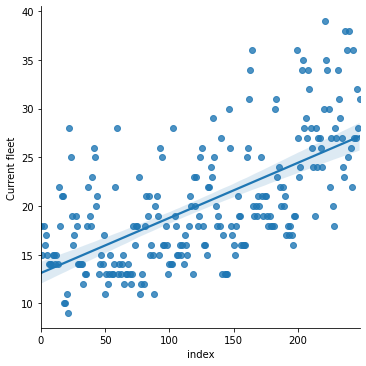

In [13]:
sns.lmplot("index","Current fleet", data = df_vehicle, fit_reg=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


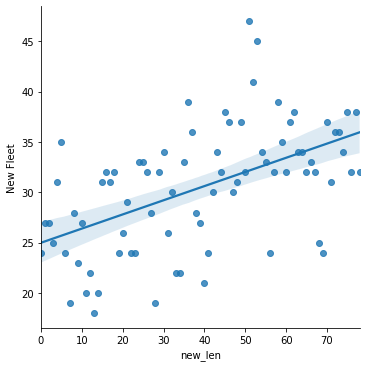

In [14]:
sns.lmplot("new_len","New Fleet", data = df_vehicle, fit_reg=True)

## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [15]:
current_fleet_mean = np.mean(current_fleet)
curent_boot_mean, current_lower, current_upper = bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 10000, 95)
print('Current Fleet:')
print(f'Mean: {current_fleet_mean}, Lower: {current_lower}, Upper: {current_upper}')

new_fleet_mean = np.mean(new_fleet)
new_boot_mean, new_lower, new_upper = bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 10000, 95)

print('\nNew Fleet:')
print(f'Mean: {new_fleet_mean}, Lower: {new_lower}, Upper: {new_upper}')

Current Fleet:
Mean: 20.14457831325301, Lower: 19.365461847389557, Upper: 20.951807228915662

New Fleet:
Mean: 30.481012658227847, Lower: 29.164556962025316, Upper: 31.82278481012658


In [16]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
 
    samp_mean = np.mean(sample2) - np.mean(sample1)
    concat = np.concatenate((sample1, sample2))

    count = 0

    for _ in range(n_permutations):
      permut = np.random.permutation(concat)

      p1 = permut[:len(sample1)]
      p2 = permut[len(sample1):]

      permut_mean = np.mean(p2) - np.mean(p1)

      if permut_mean > samp_mean:
        count += 1

    pvalue = count / n_permutations 

    return pvalue

In [17]:
sample1 = np.array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])
sample2 = np.array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0])

permut_test(sample1, sample2, 20000)

0.03345

# QUIZ

In [42]:
new_boot_mean, new_lower, new_upper = bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 10000, 95)

print('\nNew Fleet:')
print(f'Mean: {new_fleet_mean}, Lower: {new_lower}, Upper: {new_upper}')


New Fleet:
Mean: 30.481012658227847, Lower: 29.138924050632912, Upper: 31.835443037974684


In [41]:
curent_boot_mean, current_lower, current_upper = bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 10000, 92)
print('Current Fleet:')
print(f'Mean: {current_fleet_mean}, Lower: {current_lower}, Upper: {current_upper}')

Current Fleet:
Mean: 20.14457831325301, Lower: 19.449799196787147, Upper: 20.863453815261042


In [27]:
def bootstrap_std(x, sample_size, n_bootstraps, ci):
  bootstraps = [np.random.choice(x, sample_size) for _ in range(n_bootstraps)]
  data_std = np.std(x)
  stds = [np.std(row) for row in bootstraps]

  half_ci = (100 - ci) / 2
  lower = np.percentile(stds, half_ci)
  upper = np.percentile(stds, 100 - half_ci)

  return data_std, lower, upper

In [44]:
current_fleet_std = np.std(current_fleet)
current_boot_std, new_lower, new_upper = bootstrap_std(current_fleet, current_fleet.shape[0], 10000, 95)

print('\ncurrent Fleet:')
print(f'Std: {current_fleet_std}, Lower: {new_lower}, Upper: {new_upper}')


current Fleet:
Std: 6.401805462179708, Lower: 5.808646306703949, Upper: 6.928953674385309


In [43]:
current_fleet_std = np.std(data)
curent_boot_mean, current_lower, current_upper = bootstrap_std(data, data.shape[0], 10000, 95)
print('Current Fleet:')
print(f'Std: {current_fleet_std}, Lower: {current_lower}, Upper: {current_upper}')

Current Fleet:
Std: 5.684296305594556, Lower: 2.7114411746750005, Upper: 7.372046277907646


In [32]:
permut_test(current_fleet, new_fleet, 30000)

0.0

In [33]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]


In [35]:
len(dem_share_PA)

67

In [36]:
len(dem_share_OH)

88

In [45]:
oh_mean = np.mean(dem_share_OH)
ohh_mean, current_lower, current_upper = bootstrap_mean_ci(dem_share_OH, len(dem_share_OH), 20000, 95)
print('OH data:')
print(f'Mean: {oh_mean}, Lower: {current_lower}, Upper: {current_upper}')

OH data:
Mean: 44.31818181818182, Lower: 42.29306534090909, Upper: 46.35523011363636


In [46]:
pa_mean = np.mean(dem_share_PA)
paa_mean, current_lower, current_upper = bootstrap_mean_ci(dem_share_PA, len(dem_share_PA), 20000, 95)
print('PA data:')
print(f'Mean: {pa_mean}, Lower: {current_lower}, Upper: {current_upper}')

PA data:
Mean: 45.476417910447765, Lower: 43.187589552238805, Upper: 47.84769776119402


In [47]:
permut_test(dem_share_OH, dem_share_PA, 10000)

0.234